<a href="https://colab.research.google.com/github/SHAO47/DeepModel/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 超參數
batch_size = 64
num_epochs = 10
learning_rate = 0.001

# 資料轉換
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 下載MNIST數據集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 94412362.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 95911079.83it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32371555.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20309732.16it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# 創建CNN模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 初始化模型、損失函數和優化器
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
# 訓練模型
for epoch in range(num_epochs):
    total_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

# 模型評估
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on training data: {(correct / total) * 100:.2f}%')

Epoch [1/10], Loss: 0.1673
Epoch [2/10], Loss: 0.0585
Epoch [3/10], Loss: 0.0406
Epoch [4/10], Loss: 0.0320
Epoch [5/10], Loss: 0.0233
Epoch [6/10], Loss: 0.0205
Epoch [7/10], Loss: 0.0158
Epoch [8/10], Loss: 0.0118
Epoch [9/10], Loss: 0.0116
Epoch [10/10], Loss: 0.0096
Accuracy on training data: 99.81%


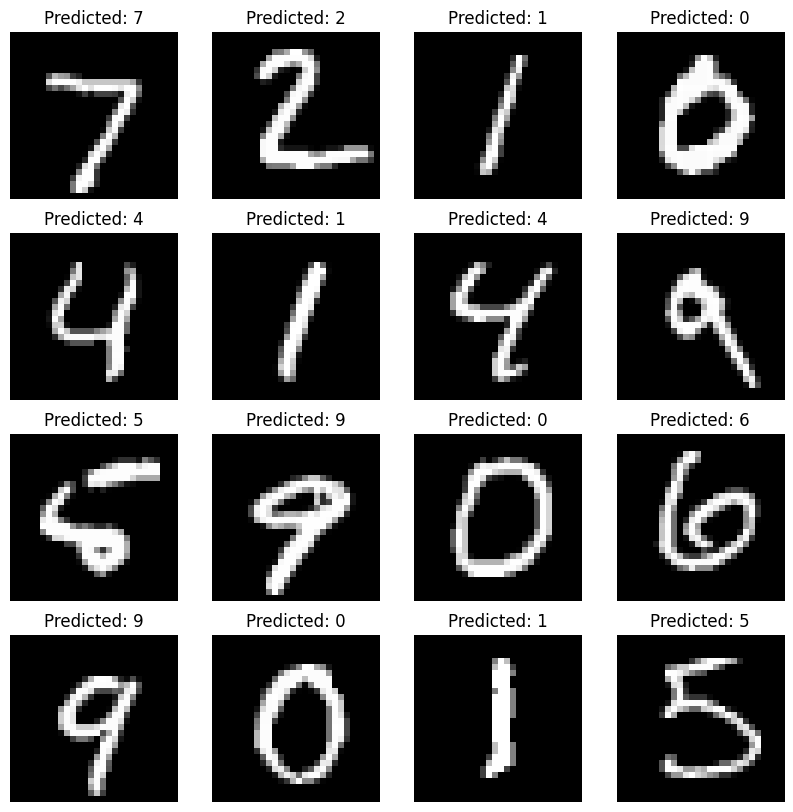

In [6]:
# 測試模型並可視化結果
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
images, labels = next(iter(test_loader))

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 顯示測試圖片及預測結果
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Predicted: {predicted[i]}')
    ax.axis('off')

plt.show()

# DNN

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 超參數
batch_size = 64
num_epochs = 10
learning_rate = 0.001

# 資料轉換
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 下載MNIST數據集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [8]:
# 創建DNN模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化模型、損失函數和優化器
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# 訓練模型
for epoch in range(num_epochs):
    total_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 0.4023
Epoch [2/10], Loss: 0.1850
Epoch [3/10], Loss: 0.1325
Epoch [4/10], Loss: 0.1098
Epoch [5/10], Loss: 0.0930
Epoch [6/10], Loss: 0.0831
Epoch [7/10], Loss: 0.0744
Epoch [8/10], Loss: 0.0659
Epoch [9/10], Loss: 0.0602
Epoch [10/10], Loss: 0.0558


In [10]:
# 模型評估
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on training data: {(correct / total) * 100:.2f}%')

Accuracy on training data: 98.78%


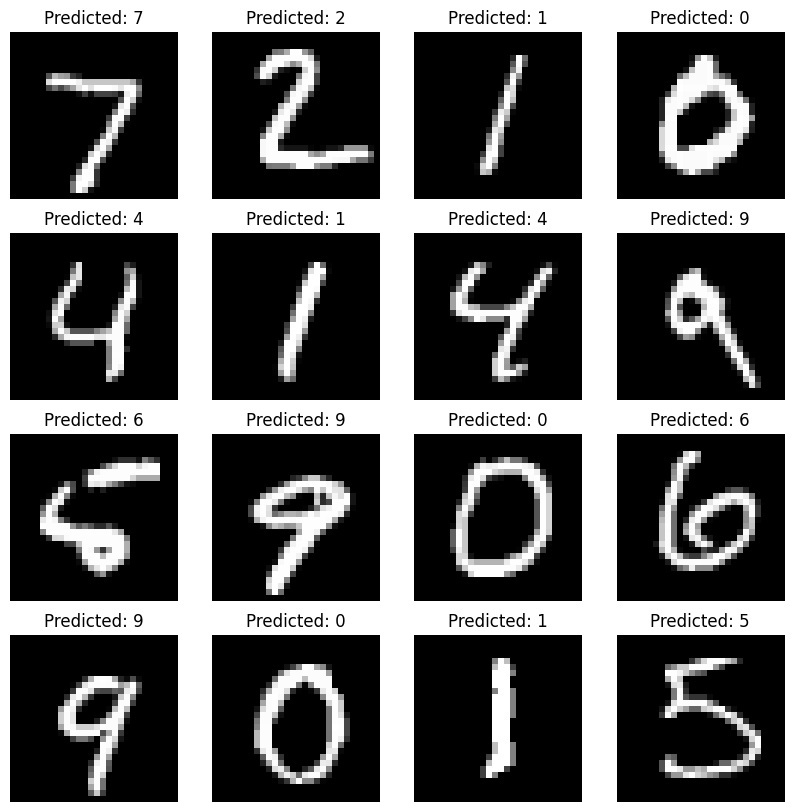

In [11]:
# 測試模型並可視化結果
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
images, labels = next(iter(test_loader))

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 顯示測試圖片及預測結果
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Predicted: {predicted[i]}')
    ax.axis('off')

plt.show()